<a href="https://colab.research.google.com/github/iordach1/GEOL572-GRL/blob/drain_cells%2Fgroenew2/EstimateRecharge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import the necessary packages

import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd

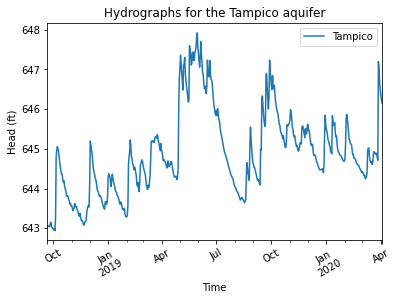

In [6]:
#Read CSV file as a dataframe for Lee 91B
tampico_csv="http://aqueduct.isws.illinois.edu/data/381654_LEE-91B_hyd.csv" #Lee 91B is connected only to the Tampico aquifer
tampico_df=pd.read_csv(tampico_csv)

#Rename the headers
tampico_df=tampico_df.rename(columns={"RECORD":"record","TIMESTAMP":"time","depth_to_water_from_land_surface":"dtw_ft","head":"head_ft"})

#Convert date strings to datetime objects
tampico_df.time=pd.to_datetime(tampico_df.time)

#Reassign the datetime as the index
#I also chose to remove the "record" and "time" columns for simplicity and to avoid redundancy
tampico_df.index=tampico_df.time
tampico_df=tampico_df.drop(["record","time"],axis=1)

#Resample to a daily time interval
tampico_d=tampico_df.resample("D").mean()

#Backfill to remove NaNs
tampico_d=tampico_d.fillna(method="bfill")

#Plot
tampico_d.head_ft.plot(label="Tampico")
plt.title("Hydrographs for the Tampico aquifer")
plt.xlabel("Time")
plt.ylabel('Head (ft)')
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [7]:
#Estimate recharge using the Water Table Fluctuation method
#Recharge is in ft/day

tampico_d["head_ft_shift"]=tampico_d["head_ft"].shift()
tampico_d["delta_h"]=tampico_d["head_ft"]-tampico_d["head_ft_shift"]
tampico_d=tampico_d.fillna(method="bfill")
sy=0.2 # An estimate, but not inconsistent with the 0.05-0.3 range obtained from Ferris et al. (1962) via Burch
tampico_d["recharge"]=tampico_d.delta_h*sy
tampico_d.recharge[tampico_d.recharge<0]=0
tampico_m=tampico_d.resample("M").mean()
print(tampico_m)

              dtw_ft     head_ft  head_ft_shift   delta_h  recharge
time                                                               
2018-09-30  6.508433  643.061567     643.066008 -0.004508  0.002292
2018-10-31  5.534005  644.035995     644.018454  0.017540  0.014293
2018-11-30  6.195264  643.374736     643.375389 -0.000653  0.005181
2018-12-31  5.510067  644.059933     644.051559  0.008374  0.013358
2019-01-31  5.714906  643.855094     643.871438 -0.016344  0.006495
2019-02-28  5.156399  644.413601     644.365937  0.047664  0.020682
2019-03-31  4.775470  644.794530     644.782997  0.011532  0.011022
2019-04-30  4.900236  644.669764     644.609639  0.060125  0.019414
2019-05-31  2.467258  647.102742     647.077769  0.024973  0.024723
2019-06-30  2.814125  646.755875     646.813083 -0.057208  0.013111
2019-07-31  4.620269  644.949731     645.006626 -0.056895  0.001927
2019-08-31  5.410995  644.159005     644.140565  0.018441  0.015546
2019-09-30  4.136903  645.433097     645.361736 